In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [3]:
income_statement = pd.read_csv('/home/hunyadi95/p/viz_p/data/Income Statement.csv',header= 1,index_col=0, na_values=['NaN','NM']).round(decimals=2)

In [4]:
balance_sheet = pd.read_csv('/home/hunyadi95/p/viz_p/data/Balance Sheet.csv',header= 1,index_col=0, na_values=['NaN','NM']).round(decimals=2)

In [5]:
cash_flow = pd.read_csv('/home/hunyadi95/p/viz_p/data/Cash Flow Statement.csv',header= 1,index_col=0, na_values=['NaN','NM']).round(decimals=2)
cash_flow

,2012-06-30,2012-09-30,2012-12-31,2013-03-31,2013-06-30,2013-09-30,2013-12-31,2014-03-31,2014-06-30,2014-09-30,...,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31
Period End Date,,,,,,,,,,,,,,,,,,,,,
Net Income to Stockholders,-157.0,-59.0,64.0,219.0,333.0,425.0,523.0,642.0,791.0,806.0,...,7349.0,4902.0,5178.0,7846.0,11219.0,9497.0,10394.0,9194.0,10285.0,7465.0
Depreciation & Amortization (CF),139.0,176.0,224.0,233.0,230.0,274.0,274.0,264.0,257.0,289.0,...,1468.0,1597.0,1704.0,1698.0,1863.0,1972.0,1986.0,1995.0,2014.0,2156.0
Amortization of Deferred Charges (CF),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock-Based Comp,1106.0,179.0,184.0,170.0,224.0,239.0,273.0,274.0,314.0,353.0,...,1274.0,1335.0,1695.0,1722.0,1784.0,1830.0,2548.0,2379.0,2407.0,2498.0
Change In Accounts Receivable,-105.0,-50.0,-80.0,54.0,-116.0,-83.0,-233.0,105.0,-187.0,-182.0,...,-1697.0,2046.0,-122.0,-377.0,-3059.0,849.0,-1366.0,-555.0,-2038.0,2557.0
Change In Inventories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Change in Other Net Operating Assets,181.0,28.0,-9.0,35.0,558.0,47.0,380.0,18.0,129.0,53.0,...,937.0,698.0,-4794.0,188.0,2606.0,-2014.0,-643.0,1166.0,3678.0,1118.0
Other Operating Activities,-924.0,-24.0,298.0,8.0,93.0,48.0,14.0,-18.0,37.0,-71.0,...,-248.0,423.0,216.0,-1248.0,-373.0,108.0,328.0,-89.0,1758.0,-1718.0
Cash from Operations,240.0,250.0,681.0,719.0,1322.0,950.0,1231.0,1285.0,1341.0,1248.0,...,9083.0,11001.0,3877.0,9829.0,14040.0,12242.0,13247.0,14090.0,18104.0,14076.0


In [6]:
valuation_ratios=pd.read_csv('/home/hunyadi95/p/viz_p/data/Valuation Ratios.csv',header= 1,index_col=0, na_values=['NaN','NM']).round(decimals=2)

/tmp/ipykernel_47774/3709303217.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=income_statement.columns.str.slice(0,7), rotation=60)


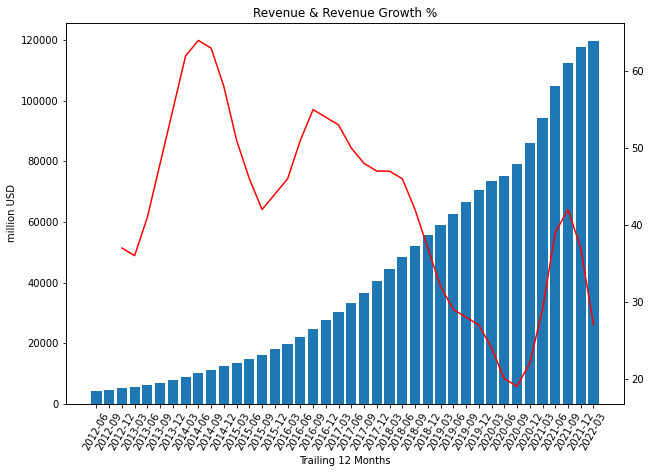

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(income_statement.columns,income_statement.loc['Revenue'].values,)
ax.set(title="Revenue & Revenue Growth %",xlabel='Trailing 12 Months',ylabel='million USD')
ax.set_xticklabels(labels=income_statement.columns.str.slice(0,7), rotation=60)
ax2=ax.twinx()
ax2.plot(income_statement.loc['Revenue Growth (YoY)'].values*100,color='r')
plt.show()
# fig.savefig('Revenue.png')

/tmp/ipykernel_47774/3915136216.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(income_statement.columns.str.slice(0,7),rotation=60)


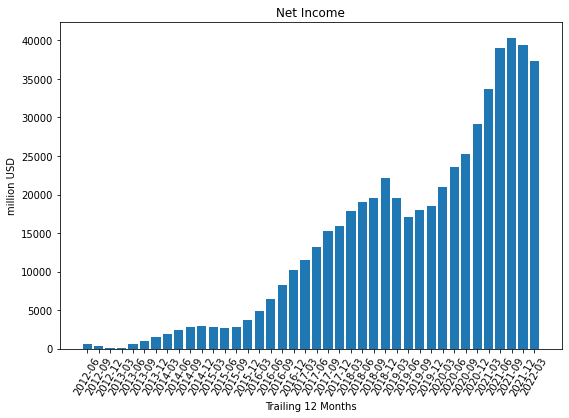

In [35]:
free_cash_flow= cash_flow.loc['Cash from Operations'] - cash_flow.loc['Capital Expenditures']

fig, ax = plt.subplots(figsize=(9,6))
ax.bar(income_statement.columns ,income_statement.loc['Net Income to Company'].values,)
ax.set(title="Net Income",xlabel='Trailing 12 Months',ylabel='million USD')
ax.set_xticklabels(income_statement.columns.str.slice(0,7),rotation=60)
plt.show()


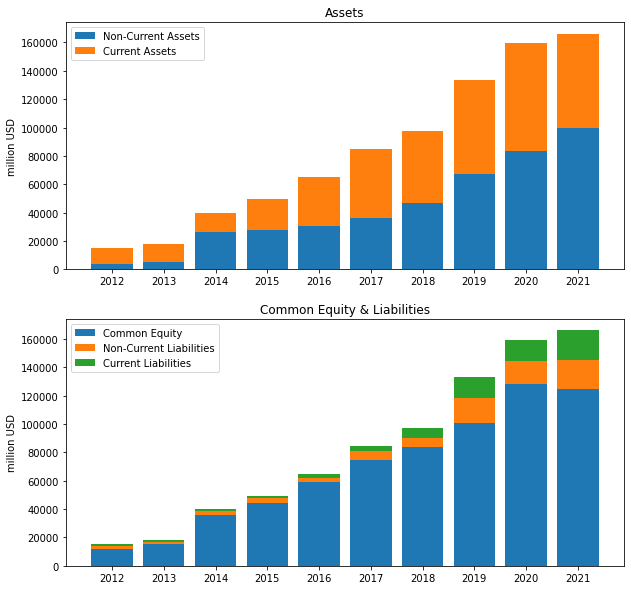

In [9]:
non_current_assets = balance_sheet.loc['Total Assets'].values - balance_sheet.loc['Total Current Assets'].values
non_current_liabilities= balance_sheet.loc['Total Liabilities'].values - balance_sheet.loc['Total Current Liabilities'].values


fig, (ax1,ax2)=plt.subplots(figsize=(10,10), ncols=1, nrows=2)
ax1.bar(balance_sheet.columns.str.slice(0,4), non_current_assets, label= 'Non-Current Assets')
ax1.bar(balance_sheet.columns.str.slice(0,4), balance_sheet.loc['Total Current Assets'].values, label= 'Current Assets', bottom=non_current_assets)
ax1.set(title='Assets', ylabel='million USD')
ax1.legend()
ax2.bar(balance_sheet.columns.str.slice(0,4), balance_sheet.loc['Common Equity'],label='Common Equity')
ax2.bar(balance_sheet.columns.str.slice(0,4), non_current_liabilities ,label='Non-Current Liabilities', bottom=balance_sheet.loc['Common Equity'])
ax2.bar(balance_sheet.columns.str.slice(0,4), balance_sheet.loc['Total Current Liabilities'],label='Current Liabilities', bottom=balance_sheet.loc['Common Equity']+non_current_liabilities)
ax2.set(title='Common Equity & Liabilities', ylabel='million USD')
ax2.legend()
plt.show()

/tmp/ipykernel_47774/1240289089.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=cash_flow.columns.str.slice(0,7), rotation=60)


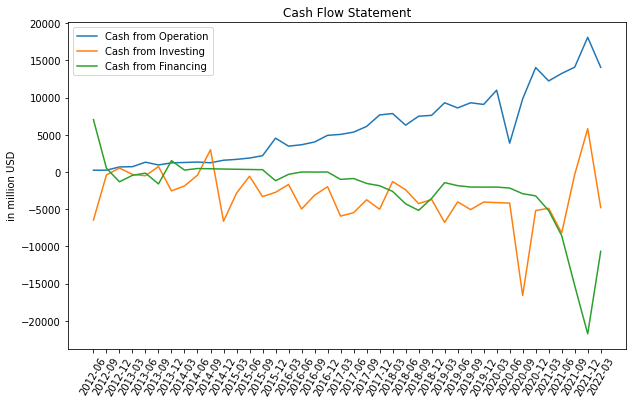

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(cash_flow.columns,cash_flow.loc['Cash from Operations'], label=('Cash from Operation'))
ax.plot(cash_flow.columns,cash_flow.loc['Cash from Investing'], label=('Cash from Investing'))
ax.plot(cash_flow.columns,cash_flow.loc['Cash from Financing'], label=('Cash from Financing'))
ax.set(title='Cash Flow Statement', ylabel='in million USD')
ax.set_xticklabels(labels=cash_flow.columns.str.slice(0,7), rotation=60)
ax.legend()
plt.show()